#### VERSION: RH_reg_04

# Objective & Data Description

In [1]:
#Objective:

#The task is to build a model that will predict the price of a house based on features provided in the dataset.

#Data description:

#Id: Unique identification number for the property.
#date: date the house was sold.
#price: price of the house.
#waterfront: house which has a view to a waterfront.
#view: we are assuming here that 0 is bad, 4 is excellent
#condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
#grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
#Sqft_above: square footage of house apart from basement.
#Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
#Sqft_lot15: lotSize area in 2015(implies - some renovations).


# Importing Modules & Data

In [2]:
###### importing modules #####

import pandas as pd
import numpy as np
#import datetime
#import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("whitegrid")
%matplotlib inline

from scipy.stats import norm
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
# importing the data into a dataframe
df = pd.read_csv("/Users/rayanhawili/Desktop/IR_DAFT/Projects/Midterm_regression_project/data_regression/regression_data_clean_original.csv")

# Checking the Data Shape / Type

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.shape

(21597, 21)

In [6]:
df.columns
#we notice that all the column headers are already standardized. No need to act on this.

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [7]:
df.describe() #first check for outliers

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [8]:
# We notice that columns "waterfront", "views", "sqft_basement" and yr_renovated" have 0 as entries.
# we will need to keep an eye on those in order to make sure our model doens't consider them as 0 but rather as categories

In [9]:
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

# Arranging Data Types of columns

In [10]:
df['date'] =  pd.to_datetime(df['date'])

In [11]:
#parking formulas here in case I decide to change certain columns to categorical. Potentially waterfront

#df['waterfront'] = df['waterfront'].astype('category')
#df['waterfront'] = df['waterfront'].astype('int')

In [12]:
list(df.select_dtypes(include=['int']).columns)

['id',
 'bedrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [13]:
#selecting numerical columns
df.select_dtypes('number').head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [14]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

# Checking & Adjusting Variables Values

In [15]:
#going to check the value counts of relevant columns to see if we potential drop some
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [16]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
#will be dropping the row for the house with 33 bedroom as it seems to be a data entry error when comparing to the other row variables
# the house is too small and lacks adequate number of bathrooms
df.loc[df['bedrooms'] == 33]



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [18]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [19]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [20]:
df['waterfront'].value_counts()
#we see that the big majority of values do not have a waterfront, we could think of removing the column.
# but leaving it since it seems from a real estate perspective an important feature

0    21434
1      163
Name: waterfront, dtype: int64

In [21]:
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [22]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [23]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [24]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [25]:
df['yr_renovated'].value_counts() #I will be making this column binomial renovated yes/no

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [26]:
df.loc[df.yr_renovated > 0, 'yr_renovated'] = 1
df['yr_renovated'].value_counts()

0    20683
1      914
Name: yr_renovated, dtype: int64

In [27]:
df.loc[df.sqft_basement > 0, 'sqft_basement'] = 1
df['sqft_basement'].value_counts()

0    13110
1     8487
Name: sqft_basement, dtype: int64

In [28]:
df["condition"].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1}, inplace=True)
df['condition'].value_counts()

1    21398
0      199
Name: condition, dtype: int64

In [29]:
df["yr_built"].replace({
1900 : 1,1901 : 1,1902 : 1,1903 : 1,1904 : 1,1905 : 1,1906 : 1,1907 : 1,1908 : 1,1909 : 1,1910 : 1,
1911 : 1,1912 : 1,1913 : 1,1914 : 1,1915 : 1,1916 : 1,1917 : 1,1918 : 1,1919 : 1,1920 : 1,1921 : 1,
1922 : 1,1923 : 1,1924 : 1,1925 : 1,1926 : 1,1927 : 1,1928 : 1,1929 : 1,1930 : 1,1931 : 1,1932 : 1,
1933 : 1,1934 : 1,1935 : 1,1936 : 1,1937 : 1,1938 : 1,1939 : 1,1940 : 1,1941 : 1,1942 : 1,1943 : 1,
1944 : 1,1945 : 1,1946 : 1,1947 : 1,1948 : 1,1949 : 1,

1950 : 2,1951 : 2,1952 : 2,1953 : 2,1954 : 2,1955 : 2,1956 : 2,1957 : 2,1958 : 2,1959 : 2,1960 : 2,
1961 : 2,1962 : 2,1963 : 2,1964 : 2,1965 : 2,1966 : 2,1967 : 2,1968 : 2,1969 : 2,1970 : 2,1971 : 2,
1972 : 2,1973 : 2,1974 : 2,1975 : 2,1976 : 2,1977 : 2,1978 : 2,1979 : 2,1980 : 2,1981 : 2,1982 : 2,
1983 : 2,1984 : 2,1985 : 2,1986 : 2,1987 : 2,1988 : 2,1989 : 2,1990 : 2,1991 : 2,1992 : 2,1993 : 2,
1994 : 2,1995 : 2,1996 : 2,1997 : 2,1998 : 2,1999 : 2,

2000 : 3,2001 : 3,2002 : 3,2003 : 3,2004 : 3,2005 : 3,2006 : 3,2007 : 3,2008 : 3,2009 : 3,2010 : 3,
2011 : 3,2012 : 3,2013 : 3,2014 : 3,2015 : 3
}, inplace=True)

df['yr_built'].value_counts()

2    11906
1     4935
3     4756
Name: yr_built, dtype: int64

In [30]:
df.shape

(21597, 21)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f835a9aeee0>,
      dtype=object)

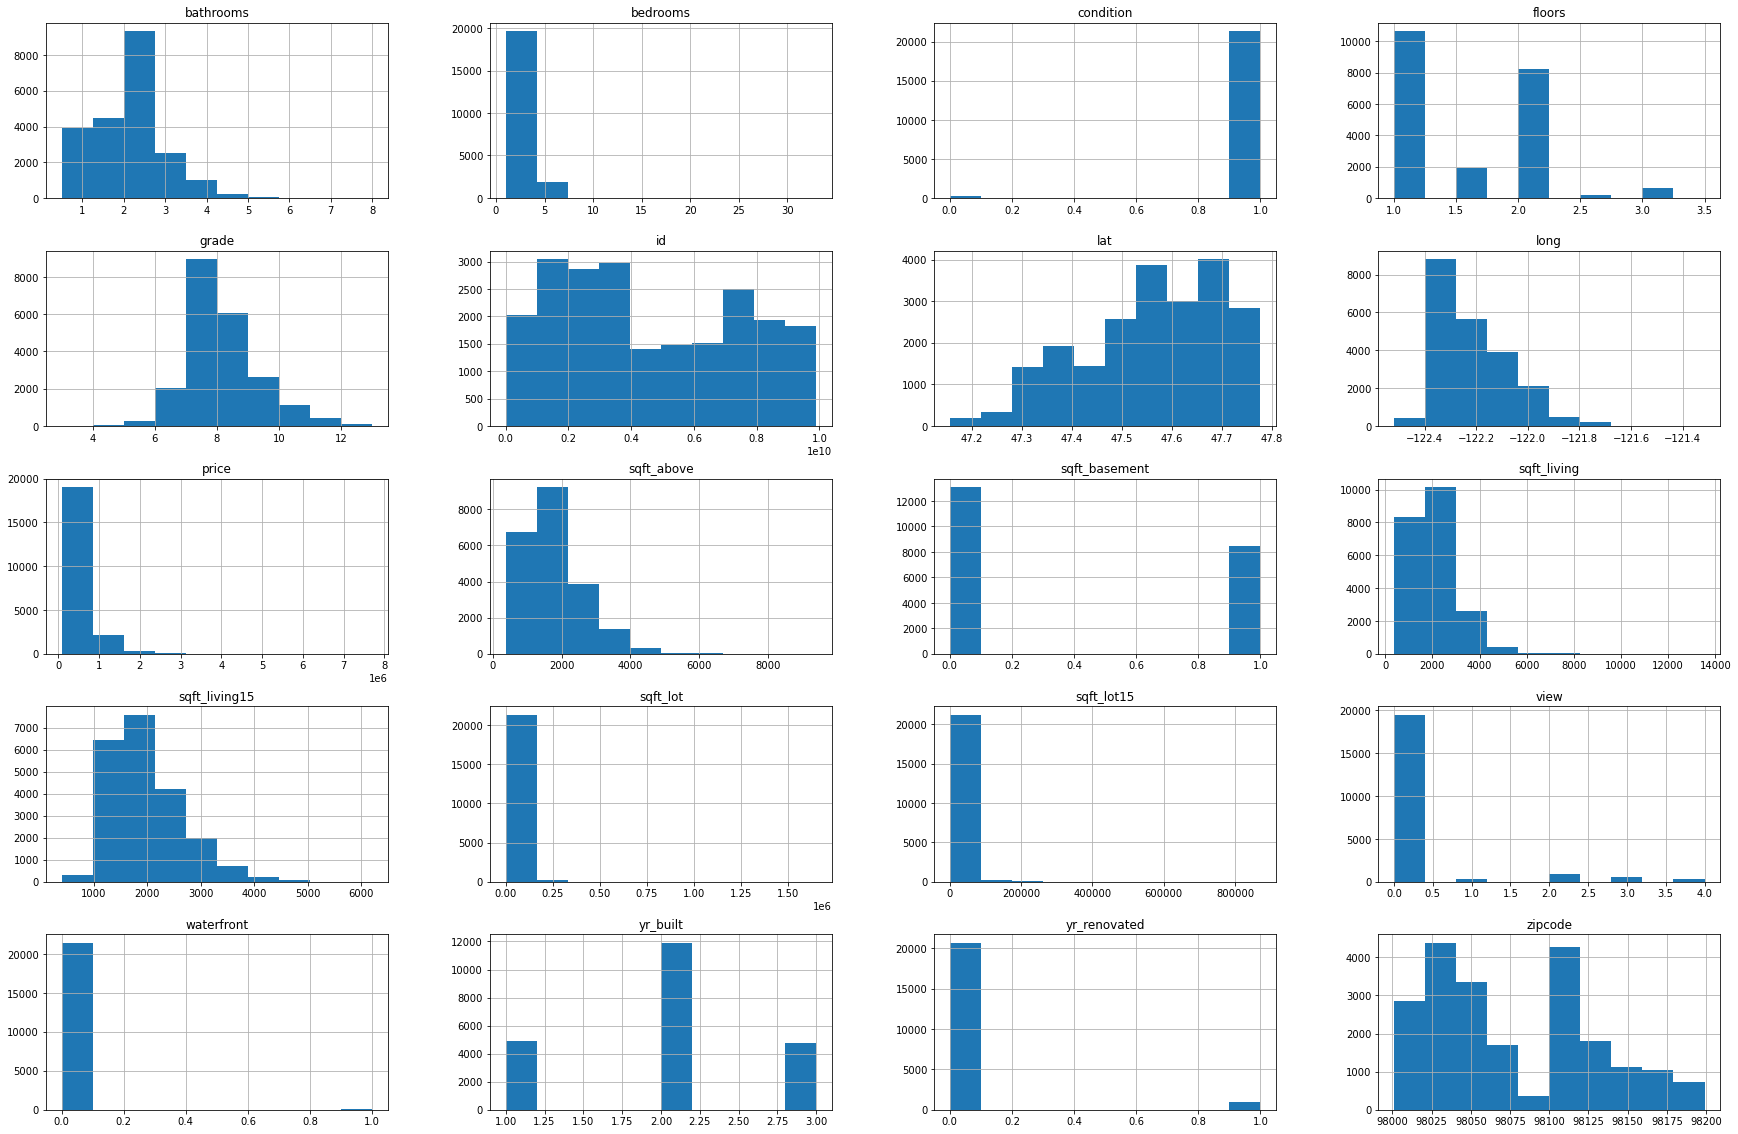

In [31]:
# HISTOGRAM PLOTTING
df.hist(figsize = (30,20))

# Checking Null Values

In [32]:
df.isna().sum()
#no null values found in data. No need to drop columns based on NA

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

# Handling Duplicates

In [33]:
#IMPORTANT

# 354 out of 21597 entries are flagged as duplicates according to the "id" column.
# after checking the date, first thought was to remove the old entry and keep the most up to date one.
# after consideration, I have decided to keep them both in, as this would feed our machine learning model about the ups and downs of the real estate market that changes in value.


# Dropping Outlier Row

In [34]:
#making copy of df before dropping
df_copy = df

In [35]:
# As previously stated the house with 33 bedroom seems to be a data entry error when comparing to the other row variables
# the house is too small and lacks adequate number of bathrooms
df.loc[df['bedrooms'] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,1,...,1040,1,1,0,98103,47.6878,-122.331,1330,4700,640000


In [36]:
df.shape

(21597, 21)

In [37]:
#get index
i = df[(df.bedrooms == 33)].index
print(i)

Int64Index([15856], dtype='int64')


In [38]:
df.drop((i), inplace=True)

In [39]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [40]:
df.shape

(21596, 21)

In [41]:
df.reset_index(drop=True)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,1,...,1180,0,2,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,1,...,2170,1,2,1,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,1,...,770,0,1,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,1,...,1050,1,2,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,1,...,1680,0,2,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,1,...,1530,0,3,0,98103,47.6993,-122.346,1530,1509,360000
21592,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,1,...,2310,0,3,0,98146,47.5107,-122.362,1830,7200,400000
21593,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,1,...,1020,0,3,0,98144,47.5944,-122.299,1020,2007,402101
21594,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,1,...,1600,0,3,0,98027,47.5345,-122.069,1410,1287,400000


# Dropping non-relevant columns

In [42]:
df_copy.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,1,...,1180,0,2,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,1,...,2170,1,2,1,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,1,...,770,0,1,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,1,...,1050,1,2,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,1,...,1680,0,2,0,98074,47.6168,-122.045,1800,7503,510000


In [43]:
# dropping columns

#"id" doesn't provide us with relevant info
df.drop('id', axis=1)
del df['id']

 #"date" only used to retrieved the latest house value from duplicate entries. now that we have that, we can remove that column.
    #if we had more info, it would have been interesting to know how long a house was on the market and give it a grade
df.drop('date', axis=1)
del df['date']

#"lat" and "long" columns provide similar info to the zipcode variable
df.drop('lat', axis=1)
del df['lat']
df.drop('long', axis=1)
del df['long']

#"sqft_above" since ASSUMPTION the column "sqft_living15" provides a more recent state of the house
df.drop('sqft_above', axis=1)
del df['sqft_above']



In [44]:
#"sqft_living" since ASSUMPTION the column "sqft_living15" provides a more recent state of the house.
# checking for the year of renovation, latest happened in 2014, so we should be safe to assume the sale of the house happened before or same year of renovation with the limited info we have
df.drop('sqft_living', axis=1)
del df['sqft_living']

#"sqft_lot" since ASSUMPTION the column "sqft_living15" provides a more recent state of the house
df.drop('sqft_lot', axis=1)
del df['sqft_lot']

In [45]:
#"view" since we are not noticing any direct correlation to price accross the different View rankings
df.drop('view', axis=1)
del df['view']

In [46]:
#"view" since we are not noticing any direct correlation to price accross the different View rankings
df.drop('grade', axis=1)
del df['grade']

In [47]:
df.head()

,bedrooms,bathrooms,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,1,0,2,0,98178,1340,5650,221900
1,3,2.25,2.0,0,1,1,2,1,98125,1690,7639,538000
2,2,1.00,1.0,0,1,0,1,0,98028,2720,8062,180000
3,4,3.00,1.0,0,1,1,2,0,98136,1360,5000,604000
4,3,2.00,1.0,0,1,0,2,0,98074,1800,7503,510000


In [48]:
df.shape

(21596, 12)

# Normalizing

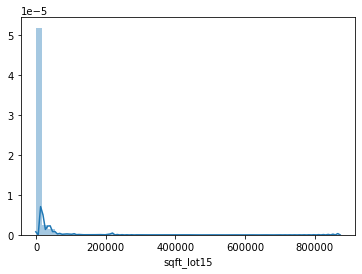

In [49]:
# potentially we could normalize this data
sns.distplot(df['sqft_lot15'])
plt.show()

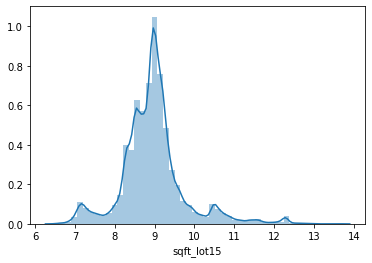

In [50]:
# how the transformation would look like
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0 
df.sqft_lot15 = list(map(log_transfom_clean, df['sqft_lot15']))
sns.distplot(df.sqft_lot15);
#plt.show()

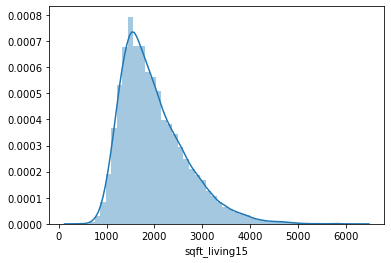

In [53]:
# potentially we could normalize this data
sns.distplot(df['sqft_living15'])
plt.show()

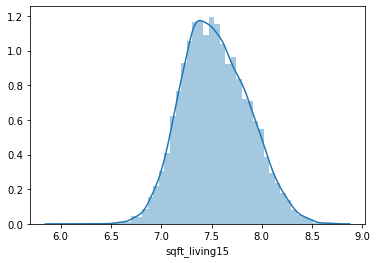

In [54]:
# how the transformation would look like
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0 
df.sqft_living15 = list(map(log_transfom_clean, df['sqft_living15']))
sns.distplot(df.sqft_living15);
#plt.show()

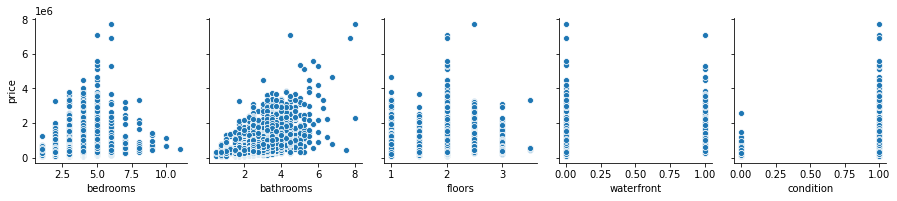

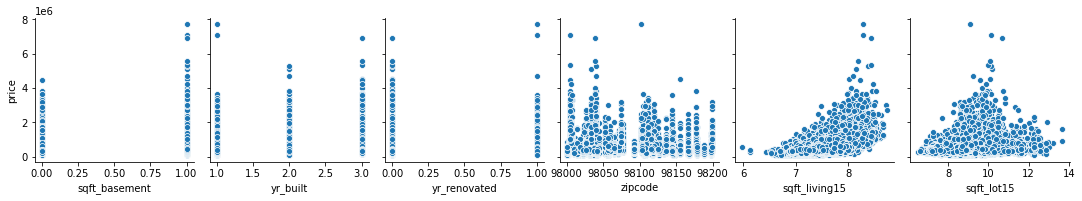

In [56]:
# plotting data post correlation to notice / remove outliers in case we needed to rework our correlation strenghts
sns.pairplot(df, x_vars=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition'], y_vars=['price'])
sns.pairplot(df, x_vars=['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], y_vars=['price'])

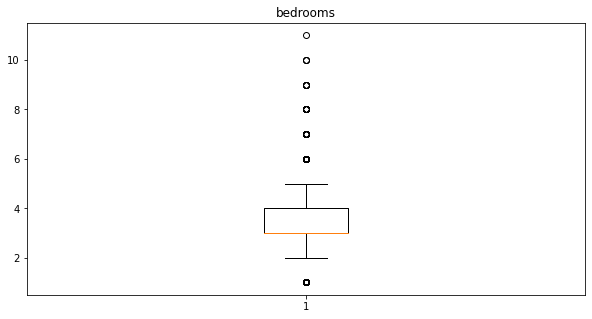

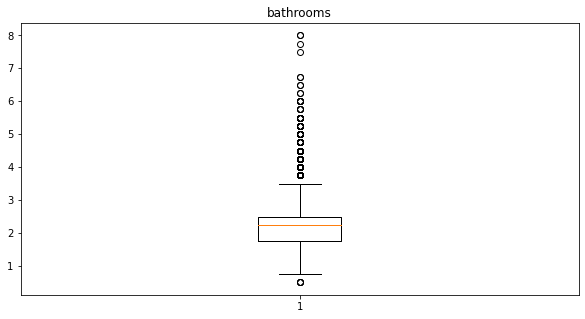

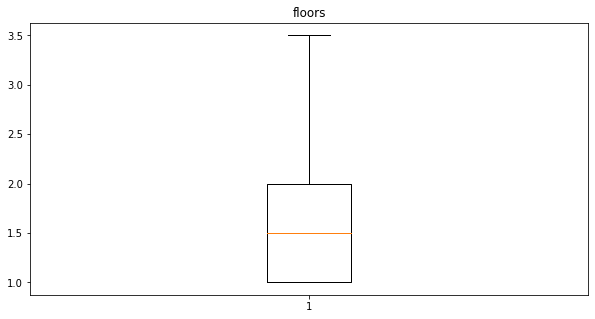

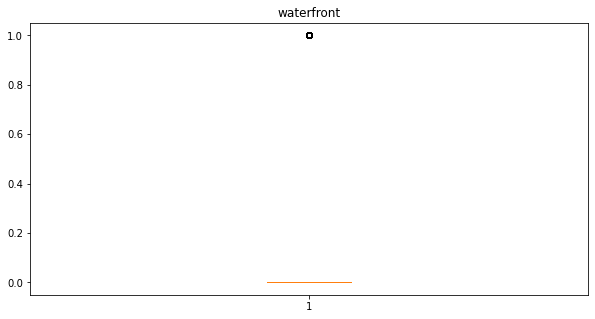

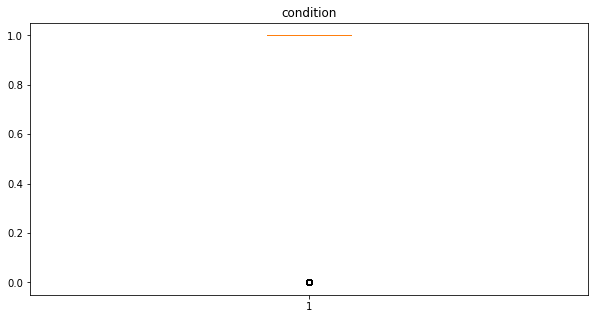

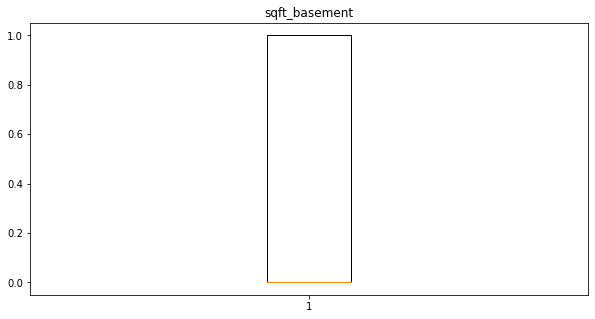

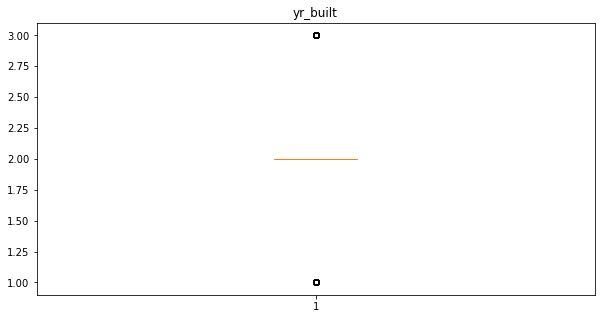

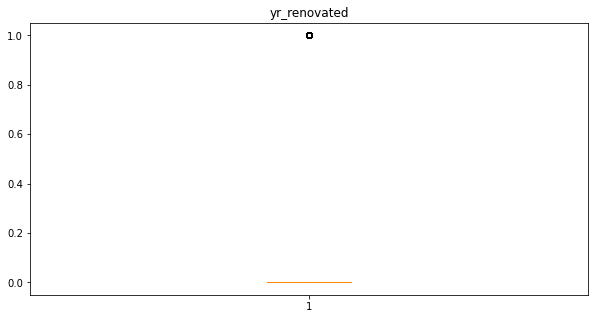

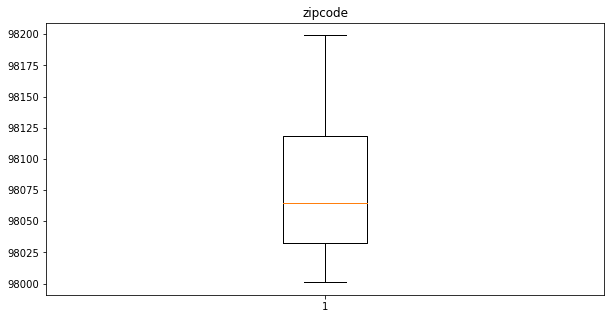

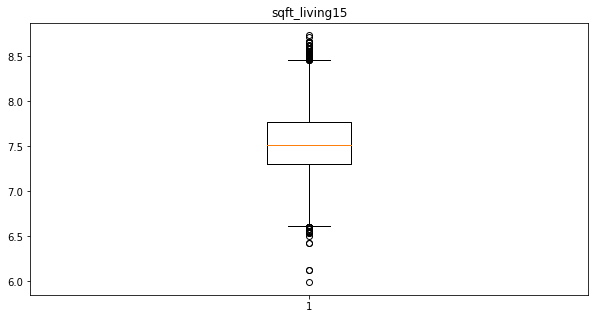

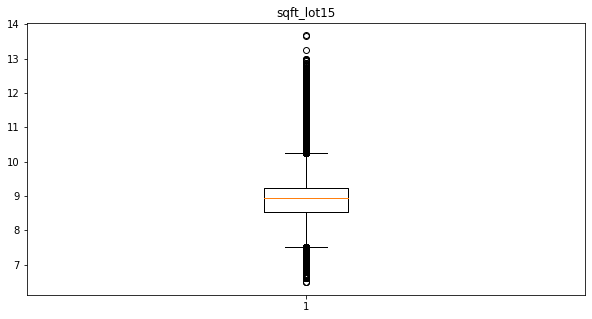

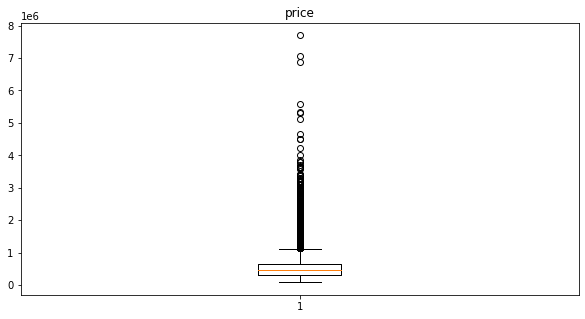

In [57]:
# boxplots
for c in df:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[c])
    plt.title(c)
    plt.show()

# Checking for multicollinearity

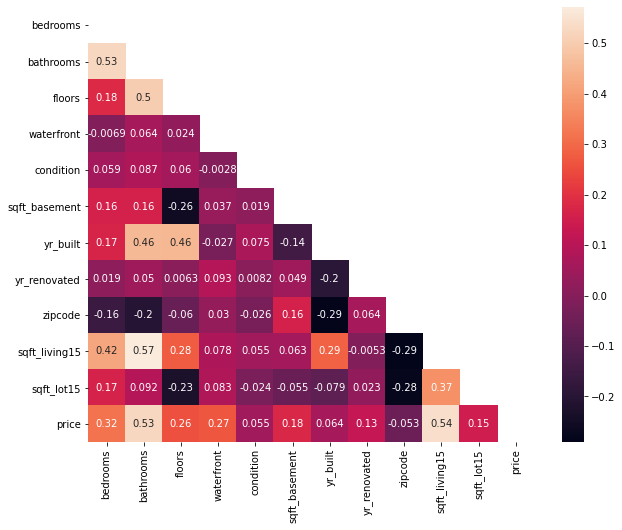

In [58]:
# correlation matrix
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [59]:
# none of the independent variables in our matrix seem to be highly correlated (more than 0.75 / less than -0.75)
# there is no need to drop any based on this

# Train test split

In [60]:
df.head()

,bedrooms,bathrooms,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,1,0,2,0,98178,7.200425,8.639411,221900
1,3,2.25,2.0,0,1,1,2,1,98125,7.432484,8.941022,538000
2,2,1.00,1.0,0,1,0,1,0,98028,7.908387,8.994917,180000
3,4,3.00,1.0,0,1,1,2,0,98136,7.215240,8.517193,604000
4,3,2.00,1.0,0,1,0,2,0,98074,7.495542,8.923058,510000


In [61]:
#assigning the variables for the train test split
X=df.loc[:, df.columns != 'price']
y=df.loc[:,'price']


# Alternative
# X = df.drop(‘price’, axis=1)
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

In [62]:
#y.head()

In [63]:
#X.head()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [65]:
X_train.shape, y_train.shape

((12957, 11), (12957,))

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = regressor.predict(X_test)

# Plotting results <font color='red'>(An unsuccessful attempt)</font>

In [86]:
# Debugging attempt to issue "different shapes X y"
# y_test=np.arange(0,len(y_test),1) # THIS FAILED!!!!!!

In [69]:
# reshaping
# y_train = y_train.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)

In [70]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [71]:
# visualizing train results
#plt.scatter(X_train, y_train, color = 'red',label= "original")
# plt.plot(X_train, regressor.predict(y_train), color = 'blue',label="predicted")
# plt.title('price vs attributes (train)')
# plt.xlabel('attributes')
# plt.ylabel('price')
# plt.show()

In [72]:
# Test section result
#plt.scatter(X_test, y_test, color = 'red', label= "original")
# plt.plot(X_test, regressor.predict(y_test), color = 'blue', label= "predicted")
# plt.title('price vs attributes (test)')
# plt.xlabel('attributes')
# plt.ylabel('price')
# plt.show()

# R-Square checks

In [73]:
# initial values
r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.46486713422847636


In [74]:
# train values
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4581260977385847


In [75]:
# test values
r_sq = regressor.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4760584564993259


In [76]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_test,y_test)
lm2.score(X_test,y_test)

0.4784790707367852

# OLS Regression Results

In [77]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y_test, X_test).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              4132.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:14:01   Log-Likelihood:                     -1.1987e+05
No. Observations:                8639   AIC:                                  2.398e+05
Df Residuals:                    8628   BIC:                                  2.398e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

(array([4.000e+00, 8.000e+00, 7.000e+00, 2.800e+01, 6.500e+01, 2.410e+02,
        2.814e+03, 5.215e+03, 2.480e+02, 9.000e+00]),
 array([-2821205.38663131, -2424177.85334855, -2027150.3200658 ,
        -1630122.78678304, -1233095.25350029,  -836067.72021753,
         -439040.18693478,   -42012.65365202,   355014.87963073,
          752042.41291349,  1149069.94619624]),
 <a list of 10 Patch objects>)

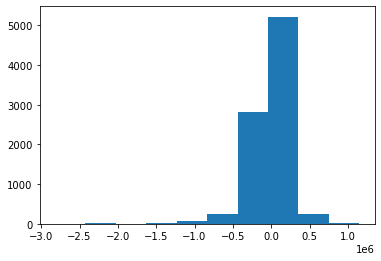

In [78]:
# Residual check
plt.hist(y_pred - y_test)

In [79]:
r2_score(y_test, predictions)

0.47633250043226605

In [80]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: -34009808.56935091
slope: [-8.35244375e+03  1.76599147e+05  5.12471577e+04  8.62224495e+05
  7.77674769e+04  5.27705240e+04 -1.12834972e+05  7.61719891e+04
  3.17275545e+02  4.25622207e+05 -9.19011368e+03]


# Confusion Matrix (considered but deemed not needed)

In [88]:
# Considered but due to our data not being categorical / not following a logistical regression model
# we do not need to make use of this

# Generalized least square model (not used for iteration decision making)

In [89]:
ols_resid = sm.OLS(y_test, X_test).fit().resid
resid_X = ols_resid[:-1].values
resid_Y = ols_resid[1:].values
res_fit = sm.OLS(resid_Y, resid_X).fit()
rho = res_fit.params

In [94]:
from scipy.linalg import toeplitz
order = toeplitz(np.arange(len(df)))
sigma = rho**order

In [102]:
gls_model = sm.GLS(y_test, X_test).fit()
print(gls_model.summary())

                                 GLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            GLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              4132.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:35:57   Log-Likelihood:                     -1.1987e+05
No. Observations:                8639   AIC:                                  2.398e+05
Df Residuals:                    8628   BIC:                                  2.398e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Iterations Log Book

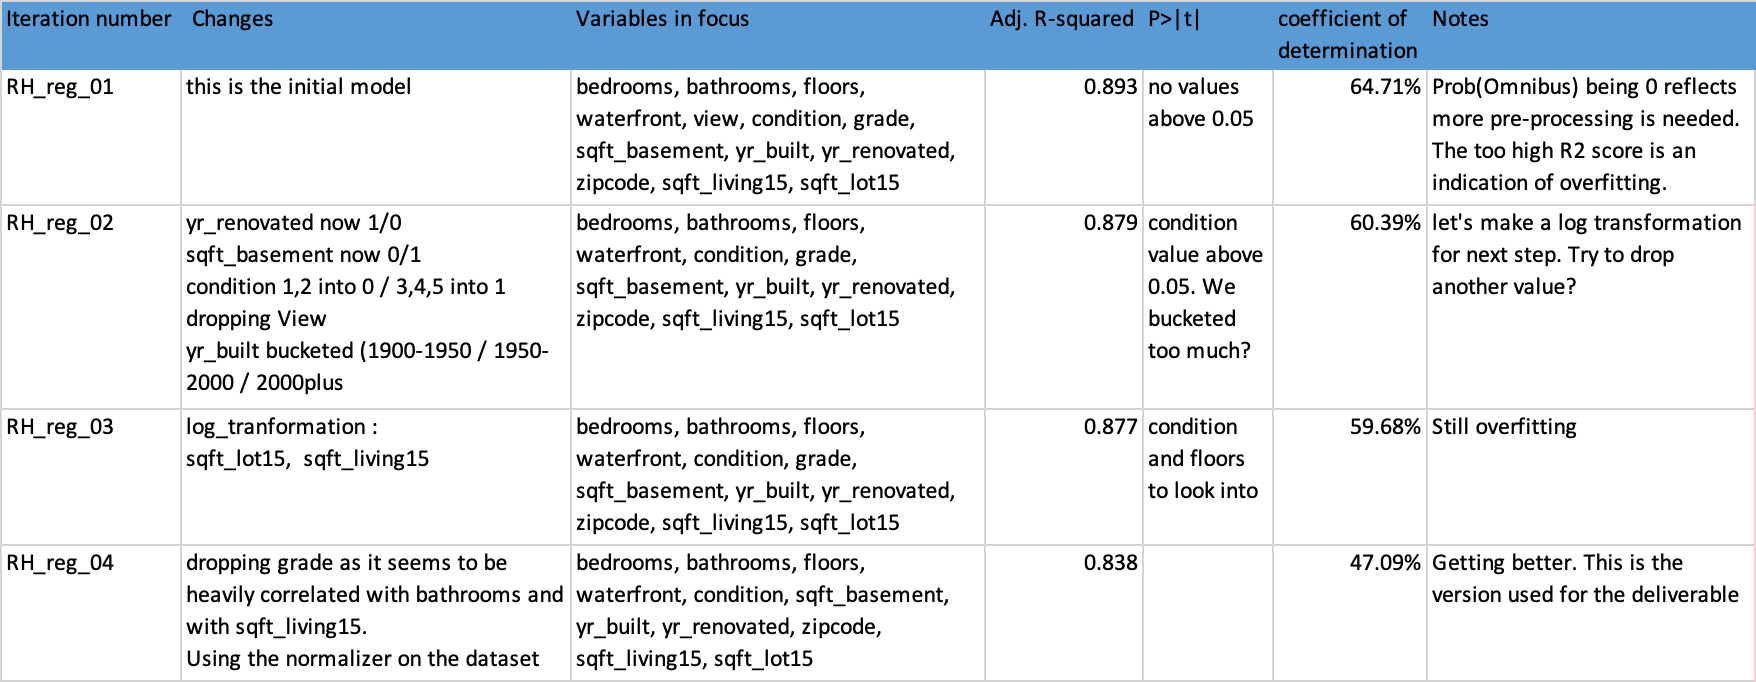

# Final Model Accuracy Notes

#### WARNING:
With an Adjusted R-Square value of 0.838, we are retrieving reliable results, yet, due to the number of variables in focus, we might still be over-fitting.

#### IMPROVEMENT POINTS:
The model has been built with including most variables and then trimming them down. A better methodology for future modeling would be to include one variable to the pot at a time and track the proportion of change in accuracy this reflects. Our goal would be to have the most impact (high accuracy) with the least amount of variables used